# Using Julia to Numerically Solve First-Order IVPs
> Initial version created by K. Oliveras on 15 January 2020

This Julia Notebook demonstrates how to numerically solve the initial value problem $$y' = y\left(1 - y\right), \qquad y(0) = 0.5$$ using an explicit Runge-Kutta method of order 5(4) (Dormand,Prince).

The following block of code loads the appropriate libraries needed to 
 1. `OrdinaryDiffEq` to use a numerical ODE solver
 2. `Plots` to create pretty plots of the solution

In [119]:
using OrdinaryDiffEq, Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

We need to first create a differential equation function.  Since we are solving the ODE $$y' = y(1-y)$$ we will define the function `ODEFun`.  Note the format.  The arguments are in the form `ODEFun(yPrime,y,p,t)`.  The input list is as follows:
 * `yPrime`: What we plan to operate on
 * `y`: The *dependent* variable
 * `p`: A *tuple* of parameters in the differential equation.  In this case, there are no free parameters, so we don't need to use it.  However, it is *required* for the ODE solver.
 * `t`: Our *independent* variable.

In [120]:
function ODEFun(yPrime,y,p,t);
   yPrime.= y.*(1.0 .- y);
end;

Now that we have defined our differential equation, we can set the range of $t$ values we want to solve over, as well as our initial condition.  

In [121]:
tSpan = (0.0,10.0);
iniCond = [0.5];

Now that we have defined the variables, we can use `Julia`'s `ODEProblem` to define the problem we want to solve.  Then, we will use the `solve` command to numerically solve the ODE.  The following block of code
 1. creates `prob` (our initial value problem)
 2. calls `solve` to solve the IVP
 3. plots the solution 

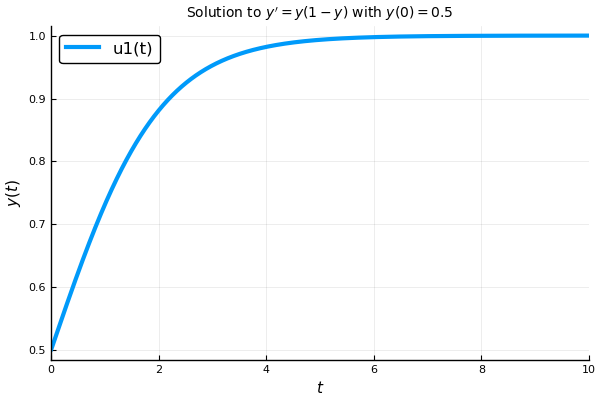

In [133]:
prob = ODEProblem(ODEFun,iniCond,tSpan);
sol = solve(prob, Tsit5(); adaptive = false, dt = 0.01);
plot(
    sol,
    xaxis=(L"$t$"),
    yaxis=(L"$y(t)$"),
    legendfontsize=12,
    title=(L"Solution to $y' = y(1-y)$ with $y(0) = 0.5$"),
    titlefontsize=10)

## Plotting solutions with multiple initial conditions

Now, let's see how the solutions changes as we vary the initial conditions.  Let's create a vector of initial conditions so that $$y(0) = 0, 0.1, 0.2, \ldots 1.2$$  The command `a = collect(0.0:.1:1.2);` creates a vector `a` beginning at 0, and ending at 1.2 by taking 0.1 size steps.  The following command will generate the list of initial values we are interested in exploring.

In [116]:
a = collect(0.0:.1:1.2);
print(a)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]

Now, we will simply pass the array of initial conditions into the definition of our `ODEProblem`.  Using the same `solve` command as before, we can also plot our solution.  Note that I set the `legend` to be `false`.  If you were to remove this command, you would have a legend entry for each initial condition.

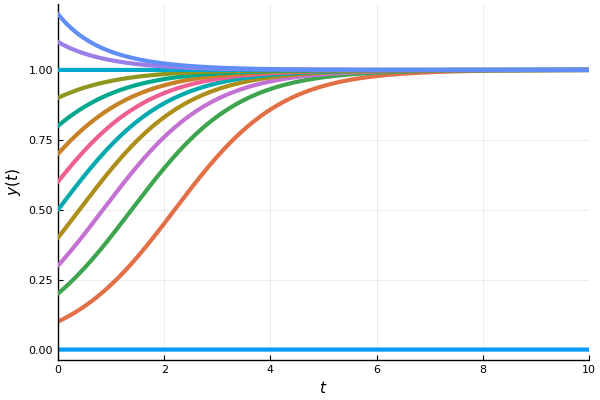

In [118]:
prob_Multiple_IniConds = ODEProblem(ODEFun,a,tSpan);
sol = solve(prob_Multiple_IniConds, Tsit5(); adaptive = false, dt = 0.01);
plot(
    sol,
    xaxis=(L"t"),
    yaxis=(L"y(t)"),
    legend=false)